# Denuncias Defensa del Consumidor

**En el siguiente trabajo se tratará un dataset que posee un listado con información de las denuncias realizadas en la Dirección General de Defensa y Protección al Consumidor de la provincia de Buenos Aires.**

*Enlace* <a href="https://data.buenosaires.gob.ar/dataset/denuncias-defensa-consumidor">*aquí*</a>

----

In [60]:
import pandas as pd
import re
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('denuncias-defensa-del-consumidor.csv', sep=';')

In [3]:
data

,DenunciaID,Fecha_Creacion,Comuna,Motivo_Denuncia,Rubro
0,1999,2019-01-02 11:07:51,11,Garantia de Bienes. Art 11 Ley 24.240 - Falta...,ELECTRODOMESTICOS Y ARTEFACTOS PARA EL HOGAR
1,2000,2019-01-02 11:10:31,11,Falta de cumplimento garantia posventa,ELECTRODOMESTICOS Y ARTEFACTOS PARA EL HOGAR
2,2001,2019-01-02 11:31:03,11,Practicas Abusivas - Venta Enganosa,"SERVICIOS FINANCIEROS (TARJETAS DE CREDITO, BA..."
3,2002,2019-01-02 12:19:49,11,Garantia de Bienes. Art 11 Ley 24.240 - Repar...,ELECTRODOMESTICOS Y ARTEFACTOS PARA EL HOGAR
4,2003,2019-01-02 15:02:31,11,Garantia de Bienes. Art 11 Ley 24.240 - Repar...,ELECTRODOMESTICOS Y ARTEFACTOS PARA EL HOGAR
...,...,...,...,...,...
33047,30886,2020-09-30 12:26:56,14,Rechazo de la devolucion del bien,"TEXTIL, CALZADO Y MARROQUINERIA"
33048,30886,2020-09-30 12:26:56,14,Falta de cumplimento garantia posventa,"TEXTIL, CALZADO Y MARROQUINERIA"
33049,30886,2020-09-30 12:26:56,14,Demora en la entrega del bien,"TEXTIL, CALZADO Y MARROQUINERIA"
33050,30887,2020-09-30 12:27:23,6,Rechazo de la devolucion del bien,MUEBLES


In [4]:
# Informacion del dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33052 entries, 0 to 33051
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   DenunciaID       33052 non-null  int64 
 1   Fecha_Creacion   33052 non-null  object
 2   Comuna           33052 non-null  int64 
 3   Motivo_Denuncia  33052 non-null  object
 4   Rubro            33052 non-null  object
dtypes: int64(2), object(3)
memory usage: 1.3+ MB


Puede observarse que el archivo tiene una cantidad de *33052* filas y *5* columnas y que no posee **ningun valor nulo** en su contenido.

### A continuación exploramos el archivo para conocer distintos comportamientos

In [5]:
data.columns

Index(['DenunciaID', 'Fecha_Creacion', 'Comuna', 'Motivo_Denuncia', 'Rubro'], dtype='object')

In [6]:
#Observamos los rubros en donde se realizan las denuncias
data['Rubro'].unique()

array(['ELECTRODOMESTICOS Y ARTEFACTOS PARA EL HOGAR',
       'SERVICIOS FINANCIEROS (TARJETAS DE CREDITO, BANCOS FINANCIERAS, ETC.)',
       'RODADOS, AUTOMOTORES Y EMBARCACIONES',
       'SERVICIOS DE COMUNICACIONES',
       'Servicios turisticos hoteles, hosterias, albergues, etc.',
       'SALUD', 'TELEFONIA Y REDES', 'ALIMENTOS Y BEBIDAS', 'MUEBLES',
       'TEXTIL, CALZADO Y MARROQUINERIA',
       'SERVICIOS PUBLICOS DOMICILIARIOS',
       'SERVICIOS DE TRANSPORTE TERRESTRE DE PASAJEROS Y CARGAS',
       'FARMACIA Y PRODUCTOS PARA LA SALUD',
       'GESTORIA Y SERVICIOS DE CONSULTORIA',
       'PELUQUERIA, DEPILACION, BELLEZA Y BIENESTAR FISICO',
       'ALQUILER DE VEHICULOS Y SERVICIO DE REMOLQUE',
       'SERVICIOS DE CONSTRUCCION PARA EL HOGAR Y COMERCIALIZACION DE INMUEBLES',
       'INFORMATICA',
       'REPARACION DE RODADOS, AUTOMOTORES Y EMBARCACIONES',
       'SERVICIOS Y EVENTOS DE ESPARCIMIENTO CULTURALES Y/O DEPORTIVOS',
       'ARTICULOS DE LECTURA Y AUDIOVISUALES',

In [7]:
#Cantidad de rubros denunciados
data['Rubro'].nunique()

44

In [8]:
#Los 5 rubros donde se realizan la mayor cantidad de denuncias
data['Rubro'].value_counts().nlargest(5)

SERVICIOS DE COMUNICACIONES                                              7297
SERVICIOS FINANCIEROS (TARJETAS DE CREDITO, BANCOS FINANCIERAS, ETC.)    5764
ELECTRODOMESTICOS Y ARTEFACTOS PARA EL HOGAR                             3234
TEXTIL, CALZADO Y MARROQUINERIA                                          2497
MUEBLES                                                                  1649
Name: Rubro, dtype: int64

In [9]:
#También podemos observar los motivos de las denuncias
data['Motivo_Denuncia'].unique()

array(['Garantia de Bienes. Art 11  Ley 24.240 - Falta de suministro de partes y accesorios',
       'Falta de cumplimento garantia posventa',
       'Practicas Abusivas - Venta Enganosa',
       'Garantia de Bienes. Art 11  Ley 24.240 - Reparacion insatisfactoria',
       'Problemas de fraude o estafa', 'Falta de Informacion',
       'Producto no funciona', 'Entrega Defectuosa - Producto danado',
       'Practicas Abusivas - Venta  Enganosa',
       'Falta de Entrega del bien',
       'Cumplimiento parcial o defectuoso de la prestacion del servicio - Falta de o conectividad deficiente',
       'Incumplimiento de Oferta  Promociones y/o Bonificaciones.  Art. 7 de la Ley 24.240',
       'Incumplimiento total de la prestacion del servicio  contratado',
       'Problemas con la devolucion del bien o el reembolso de sumas - Restricciones abusivas en las modalidades de devolucion o reembolso',
       'Clausulas abusivas o no convenidas',
       'Incumplimiento de Oferta  Promociones y/o Bon

In [10]:
#Diversa cantidad de motivos
data['Motivo_Denuncia'].nunique()

132

In [11]:
#Los 5 motivos por los cuales se realizan la mayor cantidad de denuncias
data['Motivo_Denuncia'].value_counts().nlargest(5)

Incumplimiento total de la prestacion del servicio  contratado    4956
Falta de Informacion                                              4542
Falta de Entrega del bien                                         3769
Deficiente calidad en la prestacion del servicio                  2324
Falta de cumplimento garantia posventa                            1556
Name: Motivo_Denuncia, dtype: int64

**Es normal que en este archivo existan datos duplicados, ya que los motivos o los rubros se repiten. Verificaremos datos duplicados en la fecha de creación y denunciaID para confirmar si una misma persona ha hecho más de una denuncia en un día y por diferentes motivos.**

In [12]:
#Datos duplicados en la fecha de denuncia
data['Fecha_Creacion'].duplicated().value_counts()

False    25834
True      7218
Name: Fecha_Creacion, dtype: int64

In [13]:
#Datos duplicados de la persona que efectúa la denuncia
data['DenunciaID'].duplicated().value_counts()

False    25851
True      7201
Name: DenunciaID, dtype: int64

Vemos que la cantidad de duplicados en cada una es prácticamente similar por lo que procederemos a verificar a algún denunciante para confirmarlo.

In [14]:
data['DenunciaID'].value_counts().nlargest(5)

25055    9
24713    7
26054    7
26260    7
27806    7
Name: DenunciaID, dtype: int64

In [15]:
#Aplicamos una mascara para el denunciante con más denuncias efectuadas
mask1= data['DenunciaID']== 25055

In [16]:
data[mask1]

,DenunciaID,Fecha_Creacion,Comuna,Motivo_Denuncia,Rubro
23783,25055,2020-07-03 19:36:15,4,Falta de cumplimento garantia posventa,"TEXTIL, CALZADO Y MARROQUINERIA"
23784,25055,2020-07-03 19:36:15,4,Rechazo de la devolucion del bien,"TEXTIL, CALZADO Y MARROQUINERIA"
23785,25055,2020-07-03 19:36:15,4,Demora en la entrega del bien,"TEXTIL, CALZADO Y MARROQUINERIA"
23786,25055,2020-07-03 19:36:15,4,Cobro de gastos de entrega no informados o con...,"TEXTIL, CALZADO Y MARROQUINERIA"
23787,25055,2020-07-03 19:36:15,4,Producto no funciona,"TEXTIL, CALZADO Y MARROQUINERIA"
23788,25055,2020-07-03 19:36:15,4,Clausulas abusivas o no convenidas,"TEXTIL, CALZADO Y MARROQUINERIA"
23789,25055,2020-07-03 19:36:15,4,Falta de Entrega del bien,"TEXTIL, CALZADO Y MARROQUINERIA"
23790,25055,2020-07-03 19:36:15,4,Falta de Informacion,"TEXTIL, CALZADO Y MARROQUINERIA"
23791,25055,2020-07-03 19:36:15,4,Falta de entrega del documento de venta del pr...,"TEXTIL, CALZADO Y MARROQUINERIA"


De esta manera podemos observar que el denunciante con ***ID:25055*** ha hecho una denuncia el mismo día, a la misma hora, en el mismo rubro pero con diversos motivos por lo que el organismo de defensa al consumidor, en su obligación, debe tomar todas las denuncias.

Es por ello que para este trabajo en particular los duplicados se tienen en cuenta.

----

**Otro dato a analizar puede ser la cantidad de denuncias que se recibieron el año pasado con respecto a este, diferenciando mes a mes para verificar si tienen un comportamiento balanceado.**

En esta sección se utilizará regex para poder extraer el año y el mes de la columna *Fecha_Creacion* de nuestro DataFrame y de esa manera poder hacer un conteo de la cantidad de denuncias realizadas mes a mes.

In [17]:
#Creamos un patron para poder separar la fecha (año-mes)
patron_fecha = r'\b[0-9]+-[0-9]+\b'

#Creamos un string separado por "/" para luego poder aplicar regex
string = "/".join(data['Fecha_Creacion'])

#Aplicamos la funcion findall 
fechas = re.findall(patron_fecha,string)

In [18]:
#Mostramos una porción de la lista
fechas[:10]

['2019-01',
 '2019-01',
 '2019-01',
 '2019-01',
 '2019-01',
 '2019-01',
 '2019-01',
 '2019-01',
 '2019-01',
 '2019-01']

Una vez que ya tenemos nuestra lista con las fechas, procederemos a crear dos diccionarios, uno para el 2019 y otro para el 2020 con el conteo de denuncias mes a mes.

In [19]:
#Creamos nuevamente un string pero ahora con la lista de "fechas" para luego poder pasarlo por nuestro diccionario
conjunto = '/'.join(fechas)

In [20]:
#Dicionario del registro de denuncias del año 2019
registro_2019 = {'Enero19':(re.findall(r'2019-01',conjunto)).count('2019-01'),'Febrero19':(re.findall(r'2019-02',conjunto)).count('2019-02'),'Marzo19':(re.findall(r'2019-03',conjunto)).count('2019-03'),'Abril19':(re.findall(r'2019-04',conjunto)).count('2019-04'),'Mayo19':(re.findall(r'2019-05',conjunto)).count('2019-05'),'Junio19':(re.findall(r'2019-06',conjunto)).count('2019-06'),'Julio19':(re.findall(r'2019-07',conjunto)).count('2019-07'),'Agosto19':(re.findall(r'2019-08',conjunto)).count('2019-08'),'Septiembre19':(re.findall(r'2019-09',conjunto)).count('2019-09'),'Octubre19':(re.findall(r'2019-10',conjunto)).count('2019-10'),'Noviembre19':(re.findall(r'2019-11',conjunto)).count('2019-11'),'Diciembre19':(re.findall(r'2019-12',conjunto)).count('2019-12')}

print('REGISTRO DENUNCIAS AÑO 2019')
registro_2019

REGISTRO DENUNCIAS AÑO 2019


{'Enero19': 1028,
 'Febrero19': 1228,
 'Marzo19': 1191,
 'Abril19': 1002,
 'Mayo19': 1204,
 'Junio19': 1030,
 'Julio19': 1232,
 'Agosto19': 1167,
 'Septiembre19': 1065,
 'Octubre19': 1210,
 'Noviembre19': 1291,
 'Diciembre19': 1271}

Text(0, 0.5, 'Cantidad de denuncias')

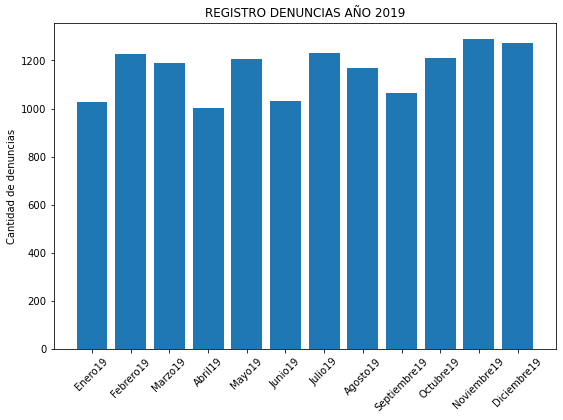

In [72]:
plt.figure(figsize=(9,6))
plt.bar(registro_2019.keys(), registro_2019.values())
plt.xticks(rotation=45 )
plt.title('REGISTRO DENUNCIAS AÑO 2019')
plt.ylabel('Cantidad de denuncias')

In [21]:
registro_2020 = {'Enero20':(re.findall(r'2020-01',conjunto)).count('2020-01'),'Febrero20':(re.findall(r'2020-02',conjunto)).count('2020-02'),'Marzo20':(re.findall(r'2020-03',conjunto)).count('2020-03'),'Abril20':(re.findall(r'2020-04',conjunto)).count('2020-04'),'Mayo20':(re.findall(r'2020-05',conjunto)).count('2020-05'),'Junio20':(re.findall(r'2020-06',conjunto)).count('2020-06'),'Julio20':(re.findall(r'2020-07',conjunto)).count('2020-07'),'Agosto20':(re.findall(r'2020-08',conjunto)).count('2020-08'),'Septiembre20':(re.findall(r'2020-09',conjunto)).count('2020-09'),'Octubre20':'sin analizar','Noviembre20':'sin analizar','Diciembre20':'sin analizar'}

print('REGISTRO DENUNCIAS AÑO 2020')
registro_2020

REGISTRO DENUNCIAS AÑO 2020


{'Enero20': 1684,
 'Febrero20': 1432,
 'Marzo20': 890,
 'Abril20': 0,
 'Mayo20': 0,
 'Junio20': 3,
 'Julio20': 7437,
 'Agosto20': 5390,
 'Septiembre20': 2297,
 'Octubre20': 'sin analizar',
 'Noviembre20': 'sin analizar',
 'Diciembre20': 'sin analizar'}

----

### Conclusiones

Por lo que se observa en el registro del año 2019 las denuncias fueron parejas a lo largo de todos los meses rondando un número de 1200 por mes.

Con lo que respecta al registro del año 2020 (las mediciones llegan hasta septiembre de este año) se ve una marcada diferencia con el año anterior, esto puede ser debido a los motivos de público conocimiento, donde la humanidad atraviesa un año atípico a causa de una pandemia.

Se puede llegar a intuir que a razón del Covid-19 y de las restricciones que se tomaron en nuestro país, el organismo de Defensa del Consumidor debe haber funcionado los primeros días de Marzo y luego tuvieron un cierre como tantas otras actividades los meses de Abril, Mayo y Junio donde no se registra ningun caso de denuncia. Pero luego en el mes de Julio se ve un abrupto crecimiento, un aumento de aproximadamente 6 veces comparado a lo normal, debido a que se retomó la actividad. El mes de Agosto siguió alto, y ya Septiembre de a poco se fue acercando más al promedio normal.

----

**Se puede hacer también una observación de los motivos más denunciados en el mes de Julio de 2020:**

In [22]:
indicador_fecha = '2020-07'

#Creamos una mascara que contenga todos los datos del mes de Julio20
mask2 = data['Fecha_Creacion'].str.contains(indicador_fecha)

In [23]:
# DataFrame nuevo con las denuncias de Julio20
denuncias_julio20 = data[mask2]

In [24]:
print('Los 5 motivos mas denunciados en Julio 20:')
denuncias_julio20['Motivo_Denuncia'].value_counts().nlargest(5)

Los 5 motivos mas denunciados en Julio 20:


Falta de Entrega del bien                                         1516
Incumplimiento total de la prestacion del servicio  contratado    1325
Falta de Informacion                                              1117
Deficiente calidad en la prestacion del servicio                   580
Demora en la entrega del bien                                      558
Name: Motivo_Denuncia, dtype: int64

In [25]:
#Creamos otra mascara para "Falta de entrega del bien" ya que fue el mayor motivo de denuncia de ese mes
mask3 = denuncias_julio20['Motivo_Denuncia'] == 'Falta de Entrega del bien'

denuncias_julio20[mask3].head(10)

,DenunciaID,Fecha_Creacion,Comuna,Motivo_Denuncia,Rubro
17961,21396,2020-07-03 09:22:54,4,Falta de Entrega del bien,CONSTRUCCION Y EQUIPAMIENTO DEL HOGAR
17981,21407,2020-07-03 09:23:22,12,Falta de Entrega del bien,MUEBLES
17984,21409,2020-07-03 09:25:21,3,Falta de Entrega del bien,ELECTRONICA
18004,21421,2020-07-03 09:31:30,4,Falta de Entrega del bien,"TEXTIL, CALZADO Y MARROQUINERIA"
18008,21424,2020-07-03 09:31:39,6,Falta de Entrega del bien,"TEXTIL, CALZADO Y MARROQUINERIA"
18010,21426,2020-07-03 09:31:45,6,Falta de Entrega del bien,DEPORTES Y RECREACION
18012,21427,2020-07-03 09:31:46,11,Falta de Entrega del bien,BAZAR Y DECORACION
18013,21428,2020-07-03 09:31:53,6,Falta de Entrega del bien,ALIMENTOS Y BEBIDAS
18018,21430,2020-07-03 09:31:55,13,Falta de Entrega del bien,CONSTRUCCION Y EQUIPAMIENTO DEL HOGAR
18021,21433,2020-07-03 09:32:06,14,Falta de Entrega del bien,MUEBLES


**Siguiendo con la conclusión anterior y estudiando en detalle el mes que recibió más denuncias, tiene bastante sentido que el motivo con mayor reclamo haya sido el de "Falta de entrega del bien" ya que en época de pandemia la gente se volcó al e-commerce, y debido a cuestiones de tiempo y logística, puede haber provocado inconvenientes en la entrega de productos.**

Cabe destacar que todas las conclusiones detalladas en el presente trabajo fueron realizadas por mera observación, exploración e intuición por lo que debería hacerse un estudio en profundidad para verificar todos los datos analizados. 

----